---------------------------------DA3---------------------------------------

22MIY0043 | HARSHA M | COURSE TITLE: MACHINE LEARNING | COURSE CODE: MAT6005

In [54]:
#SUPPORT VECTOR MACHINE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


# 1. Load and Preprocess the Data

df = pd.read_csv(r"C:\Users\geeth\Downloads\breast-cancer.csv")
print("First few rows of the dataset:")
print(df.head())

df.drop('id', axis=1, inplace=True)
df.dropna(inplace=True)

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


# 2. Select Features for Modeling & Visualization

features = ['radius_mean', 'texture_mean']
X = df[features].values
y = df['diagnosis'].values




First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  
0          0.11840           0.27760          0.3001  
1          0.08474           0.07864          0.0869  
2          0.10960           0.15990          0.1974  
3          0.14250           0.28390          0.2414  
4          0.10030           0.13280          0.1980  


In [56]:
# 3. Split and Scale the Data


# Split into training (70%) and testing (30%) sets, stratifying on the target for balance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Scale features for SVM performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)






Accuracy: 0.9211

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.95      0.91      0.93        22

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

Confusion Matrix:
[[15  1]
 [ 2 20]]


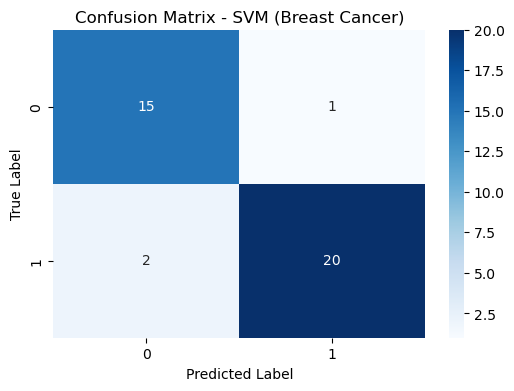

In [58]:
# 4. Train the SVM Model


# Create and train an SVM with an RBF kernel and probability estimates enabled
svm_model = SVC(kernel='rbf', probability=True, random_state=123)
svm_model.fit(X_train, y_train)


# 5. Evaluate the Model


# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Print accuracy, classification report, and confusion matrix
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: {:.4f}".format(acc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM (Breast Cancer)")
plt.show()




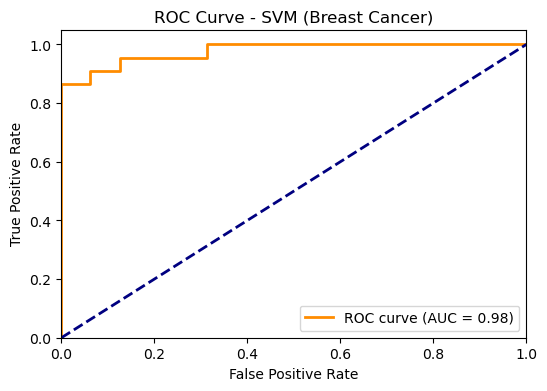

In [60]:
# 6. Plot the ROC Curve


# Obtain predicted probabilities for the positive class
y_score = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (Breast Cancer)")
plt.legend(loc="lower right")
plt.show()


In [3]:
#KNN
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv(r"C:\Users\geeth\Downloads\knn.csv")
data.columns = ['Weight', 'Height', 'Class']

# Prepare features and labels
X = data[['Weight', 'Height']]
y = data['Class']

In [4]:
# Step 1: Split first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Fit scaler on training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Transform test set using same scaler
X_test_scaled = scaler.transform(X_test)

# Step 4: Train and predict
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)


In [11]:
# Evaluation metrics
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='macro')
precision=precision_score(y_test,pred,average='macro')
recall = recall_score(y_test, pred, average='macro')
f1 = f1_score(y_test, pred, average='macro')

# Display metrics
metrics = pd.DataFrame({
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1 Score": [f1]
})
print("Performance Metrics:")
print(metrics)



Performance Metrics:
   Accuracy  Precision  Recall  F1 Score
0     0.625   0.694444     0.7  0.611111


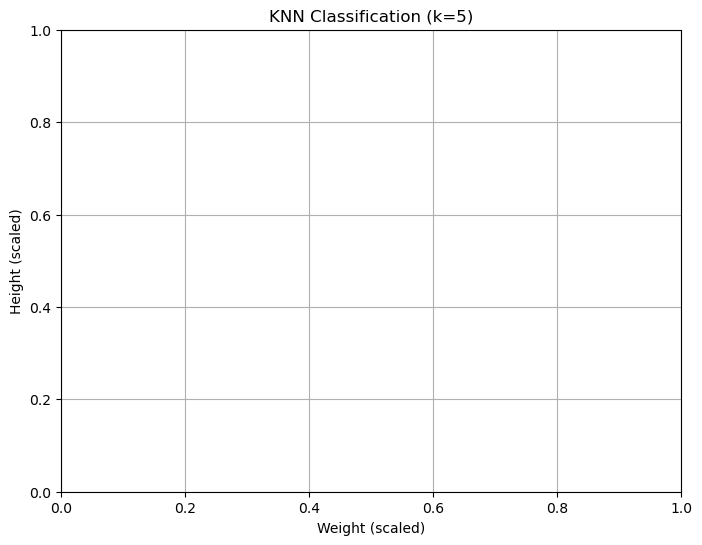

In [6]:
plot_df = pd.DataFrame(X_test, columns=['X', 'Y'])
plot_df['Predicted'] = pred

plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_df, x='X', y='Y', hue='Predicted', palette='Set1')
plt.title("KNN Classification (k=5)")
plt.xlabel("Weight (scaled)")
plt.ylabel("Height (scaled)")
plt.grid(True)
plt.show()
